<a href="https://colab.research.google.com/github/harshal-kaushik/ML-Algorithms/blob/main/SVC_practical_imjplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# creating a dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=1)

In [ ]:
X.shape

(1000, 2)

In [ ]:
y.shape

(1000,)

In [ ]:
pd.DataFrame(X)[0]

,0
0,-0.702272
1,-1.647923
2,-0.660540
3,1.432561
4,-1.155724
...,...
995,0.638293
996,-0.504162
997,-0.655349
998,1.421070


<Axes: xlabel='0', ylabel='1'>

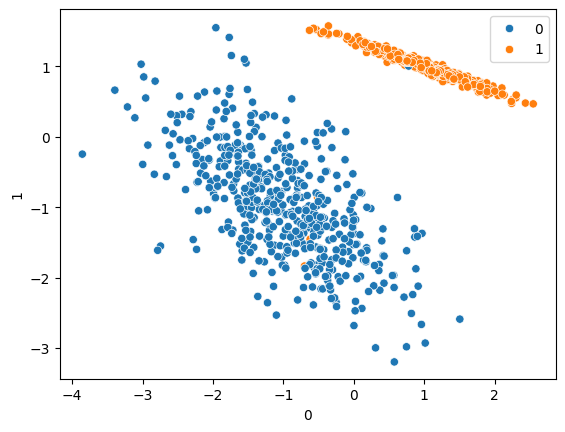

In [ ]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_prdt = svc.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test, y_prdt)
confusion_matrix(y_test, y_prdt)
print(classification_report(y_test, y_prdt))
print(accuracy_score(y_test, y_prdt))
print(confusion_matrix(y_test, y_prdt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       148

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

1.0
[[152   0]
 [  0 148]]


In [ ]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1,
                           class_sep=2.0, random_state=42)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


<Axes: xlabel='0', ylabel='1'>

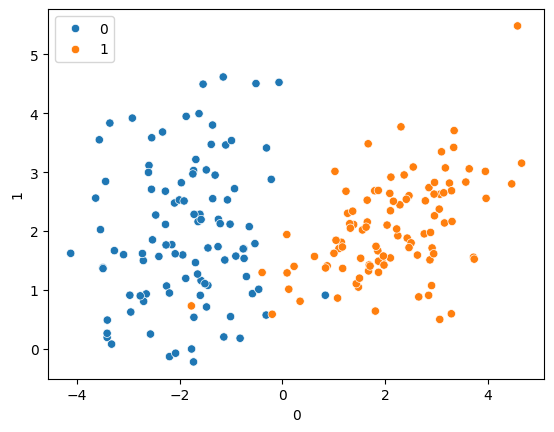

In [ ]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
C = [0.01, 0.1, 1, 10, 100]
kernel = ['linear', 'rbf']
gamma = ['scale', 'auto', 0.01, 0.1, 1]

params = dict(C=C, kernel=kernel, gamma=gamma)

model = SVC()

gridsearchcv = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
gridsearchcv.fit(X_train1, y_train1)
print("Best Parameters:", gridsearchcv.best_params_)
print("Best Accuracy:", gridsearchcv.best_score_)

Best Parameters: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.9857142857142858


In [ ]:
y_grid = gridsearchcv.predict(X_test1)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test1, y_grid))
print(accuracy_score(y_test1, y_grid))
print(confusion_matrix(y_test1, y_grid))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.96      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

0.9833333333333333
[[34  0]
 [ 1 25]]
